<a href="https://colab.research.google.com/github/Rahamatunnisa1121/ML-Algorithms/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

In [23]:
#step-2 : Load the dataset
df=pd.read_csv('/content/Iris.csv')

In [24]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Select features (X) - SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
X = df.iloc[:, [1, 2]].values  #taking only 2 features
# Select target variable (y) - Species
y = df['Species'].values  # Extract 'Species' column as target variable

In [26]:
# Convert 'Species' (categorical) into numbers
le = LabelEncoder()
y = le.fit_transform(df['Species'])  # 'Setosa' -> 0, 'Versicolor' -> 1, 'Virginica' -> 2

In [28]:
# Ensure X has no NaN or Inf values
X = np.nan_to_num(X)

In [29]:
#Step-3 : Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
#The Perceptron is sensitive to different scales of input features.

In [30]:
#Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Step 5: Create and Train the Perceptron Model
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)  # Initialize model
perceptron.fit(X_train, y_train)  # Train model

Perceptron(eta0=0.1, random_state=42)

In [32]:
#Step-6: Make Predictions
y_pred = perceptron.predict(X_test)

In [33]:
#step-7 Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')  # Print accuracy
print('Classification Report:\\n', classification_report(y_test, y_pred))  # Print detailed report

Accuracy: 90.00%
Classification Report:\n               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



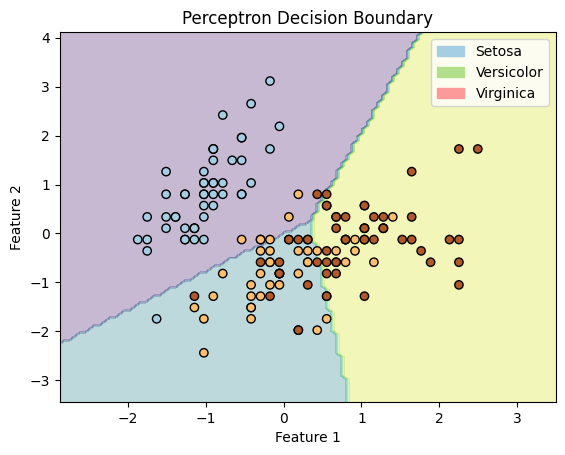

In [35]:
import matplotlib.patches as mpatches

# Step-8 Visualization
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)

    # Create a legend
    legend_labels = ['Setosa', 'Versicolor', 'Virginica']
    unique_labels = np.unique(y)
    colors = [plt.cm.Paired(i * 2) for i in unique_labels]  # Get colors from cmap
    patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(unique_labels))]

    plt.legend(handles=patches, loc='upper right')  # Set legend position

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, perceptron)
